<a href="https://colab.research.google.com/github/SimranAnand1/NLP/blob/main/stock_news_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Analysis Using News Headlines**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv('/content/Combined_News_DJIA.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
cnull=df.isnull().sum()
sumnull=df.isnull().sum().sum()
print(cnull)
print("null values",sumnull)

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64
null values 7


In [4]:
df.replace(to_replace = np.nan, value = 'abc')

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [6]:
test.shape

(378, 27)

In [7]:
train.shape

(1863, 27)

In [8]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

In [9]:
# Converting headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge


In [10]:
' '.join(str(x) for x in data.iloc[0,0:25])

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [11]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [12]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

**Algorithm Used:**

*   **Random Forest**
*   **KNN**

*   **Logistic** **Regression**
*  **RBF SVM**

**1.Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [15]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [16]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
rf_score=accuracy_score(test['Label'],predictions)
print(rf_score)
report=classification_report(test['Label'],predictions)
print(report) 

[[132  54]
 [  0 192]]
0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       186
           1       0.78      1.00      0.88       192

    accuracy                           0.86       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.86      0.85       378



True Positive 192
True Negative 132
False Positive 54
False Negative 0


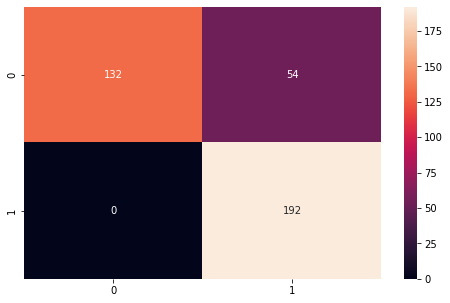

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])


**2.KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# implement K Neighbors Classifier
kneighborsclassifier=KNeighborsClassifier(n_neighbors=4, weights = "distance")
kneighborsclassifier.fit(traindataset,train['Label'])

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [21]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = kneighborsclassifier.predict(test_dataset)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
knn_score=accuracy_score(test['Label'],predictions)
print(knn_score)
report=classification_report(test['Label'],predictions)
print(report)

[[134  52]
 [  2 190]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       186
           1       0.79      0.99      0.88       192

    accuracy                           0.86       378
   macro avg       0.89      0.86      0.85       378
weighted avg       0.88      0.86      0.85       378



True Positive 190
True Negative 134
False Positive 52
False Negative 2


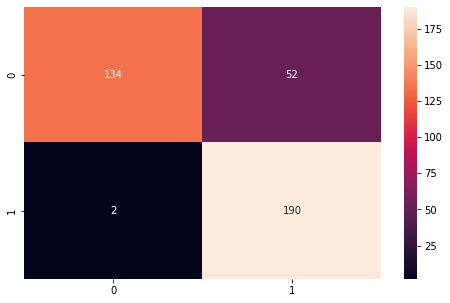

In [24]:
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])

**3.Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logisticR=LogisticRegression()
logisticR.fit(traindataset,train['Label'])

LogisticRegression()

In [27]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = logisticR.predict(test_dataset)

In [28]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
lr_score=accuracy_score(test['Label'],predictions)
print(lr_score)
report=classification_report(test['Label'],predictions)
print(report)

[[152  34]
 [ 24 168]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       186
           1       0.83      0.88      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



True Positive 168
True Negative 152
False Positive 34
False Negative 24


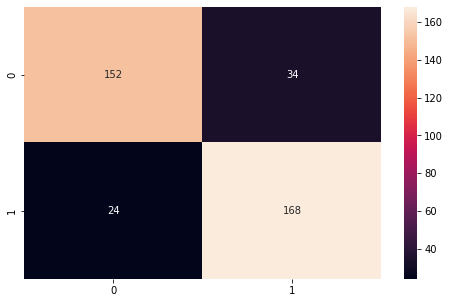

In [30]:
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])

**4.RBF SVM**

In [31]:
from sklearn import svm

In [32]:
svmcl=svm.SVC(probability=True,kernel = 'rbf')
svmcl.fit(traindataset,train['Label'])

SVC(probability=True)

In [33]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = svmcl.predict(test_dataset)

In [34]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
svm_score=accuracy_score(test['Label'],predictions)
print(svm_score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



True Positive 192
True Negative 130
False Positive 56
False Negative 0


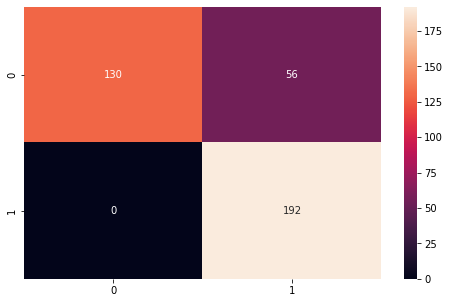

In [36]:
import seaborn as sn
cm = confusion_matrix(test['Label'],predictions)
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True,fmt ='d')
print("True Positive",cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])